# Information about the Dataset

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


German credit risk by Prof. Hofmann.Contains 1000 entries.Each entry representing a person who takes a credit by a bank.Each person is classified as "good" or "bad" credit risk based on certain characteristics.

*Retrieved from Kaggle*

## Adding libraries

## Importing the data

In [47]:
# To access and work with the dataset
import pandas as pd
# Data visualization library based on matplotlib
import seaborn as sns
# To add parameters in seaborn
import matplotlib.pyplot as plt
# Math library
import numpy as np
# For splitting data arrays into two subsets
from sklearn.model_selection import train_test_split
# multiple decision trees each of which outputs a prediction
from sklearn.ensemble import RandomForestClassifier
# computes subset accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_auc_score

# Prediction algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# for oversampling
from imblearn.over_sampling import SMOTE
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
# Read contents of the gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/Ai task and notes'

In [5]:
credit_ds =pd.read_csv(data_path +'/german_credit_data.csv')

# Understanding the data
A look at the German credit risk data to understand the data structure, unique and missing values and the data types


In [6]:
# structure of our data
print('Size of the data', credit_ds.shape)
print()
# first 10 rows of our dataset
print(credit_ds.head(10))
print()
# data types
print(credit_ds.info())
print()
# unique values
print(credit_ds.nunique())


Size of the data (1000, 11)

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   
5           5   35    male    1    free             NaN              NaN   
6           6   53    male    2     own      quite rich              NaN   
7           7   35    male    3    rent          little         moderate   
8           8   61    male    1     own            rich              NaN   
9           9   28    male    3     own          little         moderate   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951      

### Drop Unnamed: 0
it’s just a duplicate index

In [7]:
credit_ds.drop(columns=['Unnamed: 0'], inplace=True)

## Checking for missing Values

In [8]:
# check missing values
credit_ds.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [9]:
#Columns with missing values
credit_ds.loc[:, credit_ds.isnull().any()].columns

Index(['Saving accounts', 'Checking account'], dtype='object')

Based on the output column savings acounts and checking account have missing values.I am going to use a placeholder *'no_info'* for missing categorical values
This will help preserves the data and allows the model to learn whether "unknown" carries any predictive power.

In [10]:
credit_ds['Saving accounts']=credit_ds['Saving accounts'].fillna('no_info')
credit_ds['Checking account']=credit_ds['Checking account'].fillna('no_info')

In [11]:
# Check for missing values
credit_ds.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [12]:
credit_ds.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,no_info,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,no_info,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,no_info,no_info,9055,36,education,good
6,53,male,2,own,quite rich,no_info,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,no_info,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [13]:
# Unique values in savings and checking accounts
print(credit_ds["Saving accounts"].unique())
print(credit_ds["Checking account"].unique())

['no_info' 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' 'no_info' 'rich']


In [14]:
credit_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


## Data Visualization
Using count plots, bar plots, box plots, pair plots, and correlation heatmaps to explore the dataset

### Count plots
it shows the distribution of a single categorical feature. When combined with a target variable (hue='Risk'), they help visualize the relationship between features like Saving accounts or Sex and credit risk. (Seaborn Docs, n.d.) [https://seaborn.pydata.org/generated/seaborn.countplot.html]

#### 1. Target Variable Distribution
Essential for choosing model evaluation metrics like ROC-AUC or F1-score

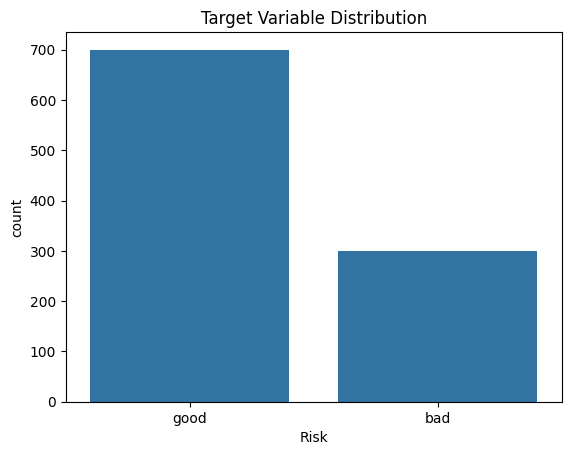

In [15]:
sns.countplot(x='Risk', data=credit_ds)
plt.title('Target Variable Distribution')
plt.show()

**The target variable is imbalanced, with many more 'good' risk cases than 'bad'. This can lead to:**

1. Bias toward predicting 'good', inflating accuracy.

2. Poor learning of 'bad' risk patterns due to few examples.

3. Misleading overall accuracy, making it an unreliable performance metric.'

*N.B Credit risk imbalance is common because most borrowers repay responsibly, and lenders use strict criteria to avoid high-risk applicants. Additionally, 'bad' credit events are rarer and more strictly defined than 'good' ones.*

**Why you shuld address Imbalances:**
Addressing imbalance is vital because misclassifying 'bad' risk can cause major financial losses and undermine the model's purpose.

Additionally, regulatory standards demand accurate risk detection, which biased models may fail to meet.

Techniques to Handle Imbalance:

1. Oversampling: Use SMOTE or ADASYN to create synthetic 'bad' cases.

2. Undersampling: Apply random undersampling or Tomek Links to reduce 'good' cases.

3. Cost-Sensitive Learning: Assign higher weights to 'bad' cases during training.

4. Ensemble Methods: Use Balanced Random Forests or boosting algorithms (like XGBoost with scale_pos_weight).

I will be using oversampling(SMOTE) abd Ensemble methods(XGBootd with scale_pos_weight )


#### 2. Bar Plots for Categorical Features vs. Risk

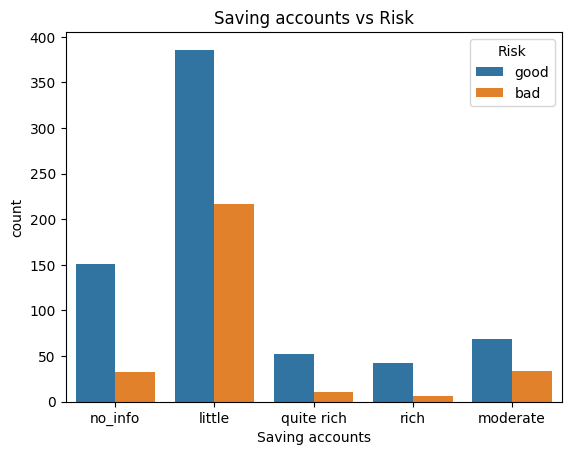

In [16]:
# Saving accounts vs Risk
sns.countplot(x='Saving accounts', hue='Risk', data=credit_ds)
plt.title('Saving accounts vs Risk')
plt.show()

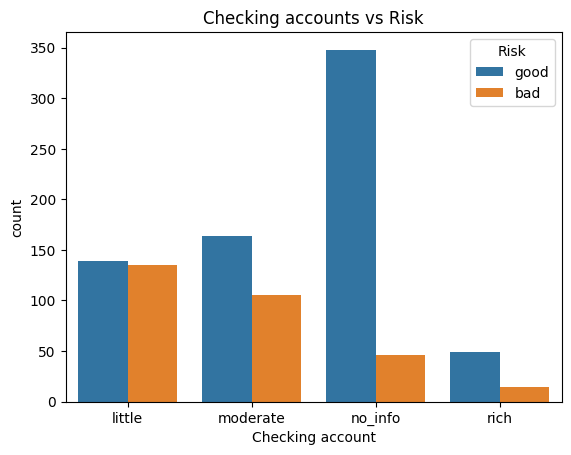

In [17]:
# Checking accounts vs Risk
sns.countplot(x='Checking account', hue='Risk', data=credit_ds)
plt.title('Checking accounts vs Risk')
plt.show()

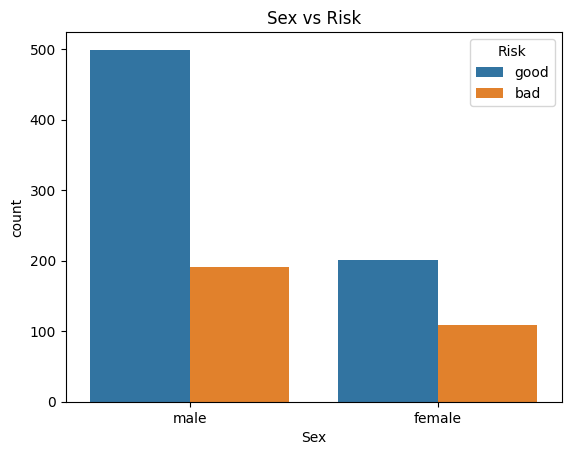

In [18]:
# Sex vs Risk
sns.countplot(x='Sex', hue='Risk', data=credit_ds)
plt.title('Sex vs Risk')
plt.show()

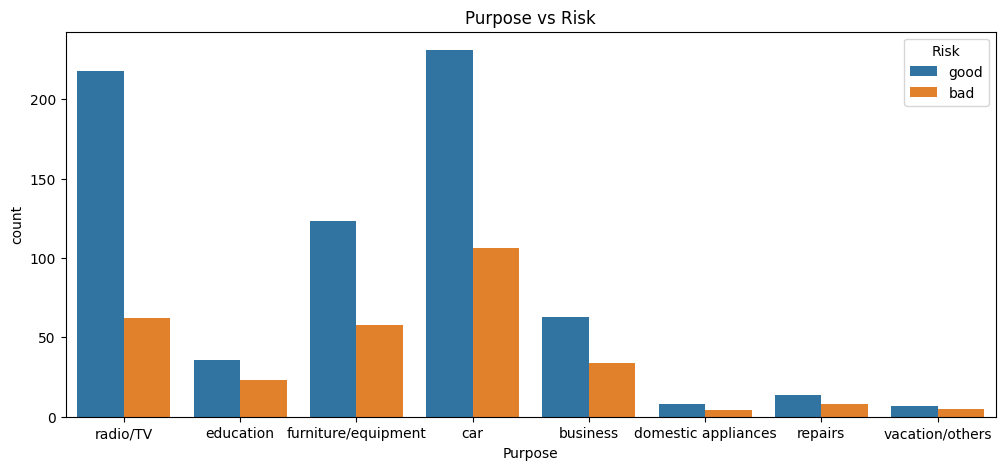

In [19]:
# Purpose vs Risk
plt.figure(figsize=(12, 5))
sns.countplot(x='Purpose', hue='Risk', data=credit_ds)
plt.title('Purpose vs Risk')
plt.show()

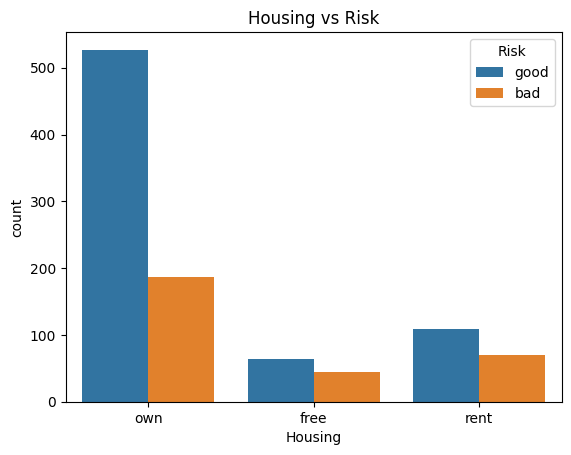

In [20]:
# Housing vs Risk
sns.countplot(x='Housing', hue='Risk', data=credit_ds)
plt.title('Housing vs Risk')
plt.show()

### Box plots
To display the spread and skewness of numerical data across categories. Plotting features like Credit amount or Age against Risk reveals trends and outliers. (Seaborn Docs, n.d.) [https://seaborn.pydata.org/generated/seaborn.boxplot.html]

#### Boxplots for Numeric Features vs. Risk
Shows distribution and outliers

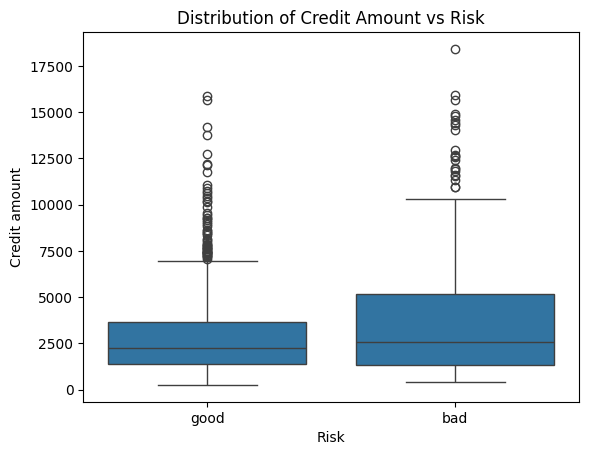

In [21]:
# Credit Amount vs Risk
sns.boxplot(x='Risk', y='Credit amount', data=credit_ds)
plt.title('Distribution of Credit Amount vs Risk')
plt.show()

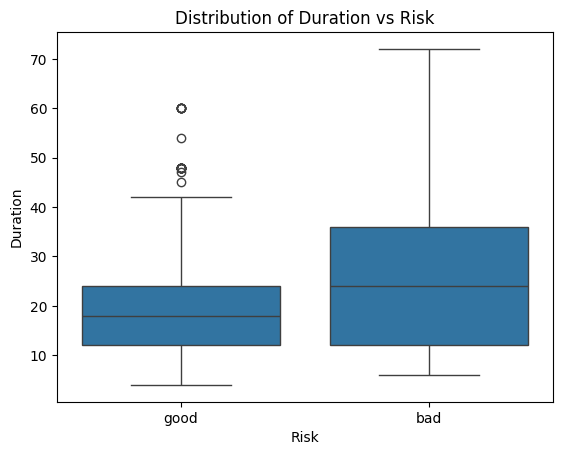

In [22]:
# Duration vs Risk
sns.boxplot(x='Risk', y='Duration', data=credit_ds)
plt.title('Distribution of Duration vs Risk')
plt.show()

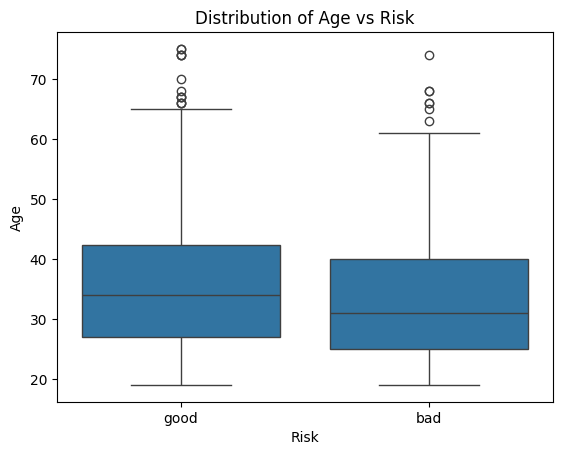

In [23]:
# Age vs Risk
sns.boxplot(x='Risk', y='Age', data=credit_ds)
plt.title('Distribution of Age vs Risk')
plt.show()

### Correlation heatmap
is a color-coded matrix that shows how strongly numerical variables relate to each other, helping detect *multicollinearity or feature strength*. (Ajitesh Kumar, 2020) [https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/]

### Correlation Heatmap (for numeric features)
Reveals relationships between variables, potential multicollinearity, and what might be useful for modeling

<Axes: >

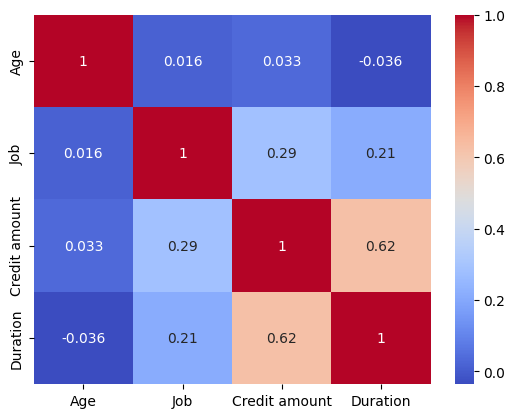

In [24]:
#Select numerics and check correlation
credit_ds_num = credit_ds.select_dtypes(include='number')
sns.heatmap(credit_ds_num.corr(), annot=True, cmap='coolwarm')

The Credit Amount has a *strong* and *postive* relationship with the Duration.This suggests that longer credit durations tend to be associated with higher credit amounts, which is logical in credit risk settings.

There is a possibility of multicollinearity. Should be checked if using linear models. check variance_inflation_factor(VIF) to assess if one of them inflates model variance.

## Encoding Categorial variables

**To prepare categorical data for modeling, we use three main techniques:**

1. Label Encoding: Best for binary nominal variables (e.g., Sex, Risk).

2. Ordinal Encoding: Used for features with a meaningful order (e.g., Saving accounts, Checking account).

3. One-Hot Encoding: Ideal for nominal variables with more than two categories (e.g., Housing, Purpose) to avoid implying hierarchy.


In [25]:
# Copy the dataset
df_encoded = credit_ds.copy()

# Label encode binary nominal features
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Risk'] = df_encoded['Risk'].map({'good': 0, 'bad': 1})  # target

# Ordinal encode 'Saving accounts'
saving_order = {'no_info': 0, 'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4}
df_encoded['Saving accounts'] = df_encoded['Saving accounts'].map(saving_order)

# Ordinal encode 'Checking account'
checking_order = {'no_info': 0, 'little': 1, 'moderate': 2, 'rich': 3}
df_encoded['Checking account'] = df_encoded['Checking account'].map(checking_order)

# One-hot encode 'Housing' and 'Purpose'
df_encoded = pd.get_dummies(df_encoded, columns=['Housing', 'Purpose'], drop_first=True)


## Predicting the Risk
We are now can move to training the model and making prediction.From research,I learnt that credit risk assessment is a *classification* and *regression* problem as we want to understand the link/relationship between the outcome(**good** or **bad** credit risk) and features(Sex, Housing...).From planning, Five predictive modelling algorithms were selected(**Logistic Regression,k-Nearest Neighbors(KNN),Support Vector Machines(SVM),Decision Tree,Random Forest**).The type of machine learning used will be supervised learning as the model will be using dataset.


### Split features and target

In [26]:
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

### Handling Imbalanced Data with SMOTE
We discovered that the dataset has an imbalance (700 'good' vs. 300 'bad' risks).

To address this, SMOTE (Synthetic Minority Over-sampling Technique) was chosen. It generates synthetic samples for the minority class ('bad') by interpolating between existing ones—helping the model learn better decision boundaries without overfitting through duplication.

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTE on the training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Define all the models

In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


## Train Evaluate the Models
Evaluate the Models to see the best one to use in the credit risk assessment

In [46]:
results = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

results_df = pd.DataFrame(results)
results_df = results_df.round(4).sort_values(by="F1 Score", ascending=False)
print(results_df.sort_values(by="F1 Score", ascending=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
4           Random Forest    0.7133     0.5222  0.5222    0.5222   0.7374
5                 XGBoost    0.7167     0.5287  0.5111    0.5198   0.7516
2     K-Nearest Neighbors    0.5933     0.3824  0.5778    0.4602   0.6143
3           Decision Tree    0.6133     0.3750  0.4333    0.4021   0.5619
0     Logistic Regression    0.6400     0.3977  0.3889    0.3933   0.6475
1  Support Vector Machine    0.7033     0.5098  0.2889    0.3688   0.6244


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Due to class imbalance, we prioritized Recall (to reduce false negatives) and F1 Score (to balance precision and recall), as Accuracy alone is misleading.
Based on these metrics, the top 2 models are XGBoost and Random Forest.

### Fine tuning the Top 2 models
We will use GridSearchCV(Exhaustive search over all possible combinations of hyperparameters) to search for the best hyperparameters

#### Fine-tune Random Forest

In [51]:
# Define model
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Hyperparameters to tune
param_grid_rf = {
    "n_estimators": [100, 150, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2',None]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Best parameters and model
print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Random Forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


#### Fine-tune XGBoost

In [52]:
# Define model
xgb_model = XGBClassifier(scale_pos_weight=1,eval_metric='logloss', random_state=42)

# Hyperparameters to tune
param_grid_xgb = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

# GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Best parameters and model
print("Best Parameters for XGBoost: ", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for XGBoost:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}


#### Final Evaluation

In [57]:
# Evaluate Random Forest
y_pred_rf = best_rf_model.predict(X_test)
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

print("\n")

# Evaluate XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # For ROC AUC
print("XGBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")

Random Forest Evaluation:
Accuracy: 0.7133
Precision: 0.5227
Recall: 0.5111
F1 Score: 0.5169
ROC AUC: 0.7448


XGBoost Evaluation:
Accuracy: 0.7267
Precision: 0.5500
Recall: 0.4889
F1 Score: 0.5176
ROC AUC: 0.7408


##### **Key Takeaways**
1. Accuracy: XGBoost has slightly better accuracy (0.7267 vs 0.7133), making it the better-performing model based on this metric.

2. Precision: XGBoost also outperforms Random Forest in precision (0.5500 vs 0.5227), meaning it is more accurate when it predicts a positive outcome.

3. Recall: Random Forest has a higher recall (0.5111 vs 0.4889), which means it identifies more actual positives.

4. F1 Score: Both models have similar F1 scores (0.5169 vs 0.5176), indicating similar performance in balancing precision and recall.

5. ROC AUC: Random Forest has a slightly higher ROC AUC score (0.7448 vs 0.7408), which suggests it has a slightly better ability to rank positive instances higher than negative ones.

*NB: XGBoost outperforms Random Forest in accuracy (0.7267 vs. 0.7133) and precision (0.5500 vs. 0.5227). However, Random Forest has a slightly better recall (0.5111 vs. 0.4889) and ROC AUC (0.7448 vs. 0.7408). Both models have similar F1 scores, making Random Forest a slightly better choice for credit risk due to its higher recall, but XGBoost is close and performs well on other metrics.*